In [1]:
# mining_iris_basket.py
"""
Task 3: Classification & Association Rule Mining
Part A: Train Decision Tree and KNN on Iris
Part B: Apriori on synthetic market basket data
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print("=== Part A: Classification on Iris Dataset ===\n")

# --- 1. LOAD & PREPROCESS ---
iris = load_iris()
X = iris.data
y = iris.target

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

=== Part A: Classification on Iris Dataset ===

Train shape: (120, 4), Test shape: (30, 4)


Training Decision Tree Classifier...
Decision Tree Accuracy: 0.967
Classification Report (Decision Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



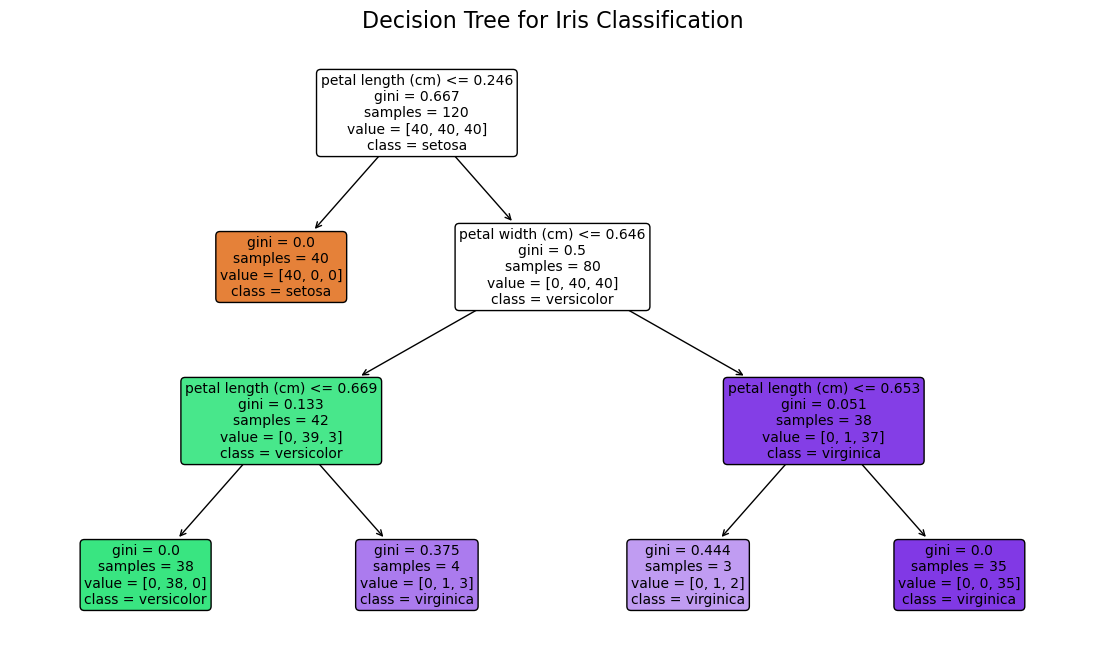

In [2]:
# --- 2. DECISION TREE ---
print("Training Decision Tree Classifier...")
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.3f}")
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

# Visualize tree
plt.figure(figsize=(14, 8))
plot_tree(dt, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Iris Classification", fontsize=16)
plt.savefig('visualizations/decision_tree.png', dpi=150, bbox_inches='tight')
plt.show()

In [3]:
# --- 3. KNN ---
print("\nTraining KNN Classifier (k=5)...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.3f}")

# Compare models
print("\n✅ Model Comparison:")
if acc_dt > acc_knn:
    print("→ Decision Tree performs better.")
elif acc_knn > acc_dt:
    print("→ KNN performs better.")
else:
    print("→ Both models perform equally well.")


Training KNN Classifier (k=5)...
KNN Accuracy: 0.967

✅ Model Comparison:
→ Both models perform equally well.


PART B: Association Rule Mining

In [5]:
# --- 4. ASSOCIATION RULE MINING ---
print("\n=== Part B: Market Basket Analysis (Apriori) ===")

import random
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Set seed
random.seed(42)

# Item pool
items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'butter', 'cheese', 'apples', 'bananas', 'chips']

# Generate 40 transactions with common patterns
transactions = []
for _ in range(40):
    basket = []
    # Strong pattern: milk + bread + butter
    if random.random() < 0.6:
        basket.extend(['milk', 'bread', 'butter'])
    # Diapers + beer (classic example)
    if random.random() < 0.4:
        basket.extend(['diapers', 'beer'])
    # Add random extras
    extra = random.choices(items, k=random.randint(0, 3))
    basket.extend(extra)
    basket = list(set(basket))  # Remove duplicates
    transactions.append(basket)

print(f"Generated {len(transactions)} transactions")

# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_basket, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values('lift', ascending=False)

# Display top 5 rules
print("\nTop 5 Association Rules (by Lift):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Save to CSV
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head().to_csv(
    'top_association_rules.csv', index=False
)
print("\n✅ Top rules saved to 'top_association_rules.csv'")


=== Part B: Market Basket Analysis (Apriori) ===
Generated 40 transactions

Top 5 Association Rules (by Lift):
                  antecedents            consequents  support  confidence  \
129           (milk, diapers)         (butter, beer)    0.375      0.9375   
157  (bread, butter, diapers)           (milk, beer)    0.375      0.9375   
155    (bread, milk, diapers)         (butter, beer)    0.375      0.9375   
171         (butter, diapers)    (bread, milk, beer)    0.375      0.9375   
169           (milk, diapers)  (bread, butter, beer)    0.375      0.9375   

         lift  
129  1.973684  
157  1.973684  
155  1.973684  
171  1.973684  
169  1.973684  

✅ Top rules saved to 'top_association_rules.csv'
